In [1]:
import tensorflow
import keras
import numpy
import pandas
import os
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras import optimizers


In [2]:
os.chdir("C:\\Users\\SVR SOLUTIONS\\Desktop\\Uday\\data")

In [3]:
us=pandas.read_csv("diabetes.csv")
us.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data = numpy.random.randint(55,90,size=767)
df = pandas.DataFrame(data, columns=['HeartRateVariability'])
df.head(5)

,HeartRateVariability
0,68
1,89
2,61
3,69
4,86


In [5]:
diabetes_prediction = pandas.concat([us, df],axis=1)

In [6]:
diabetes_prediction.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HeartRateVariability
0,6,148,72,35,0,33.6,0.627,50,1,68.0
1,1,85,66,29,0,26.6,0.351,31,0,89.0
2,8,183,64,0,0,23.3,0.672,32,1,61.0
3,1,89,66,23,94,28.1,0.167,21,0,69.0
4,0,137,40,35,168,43.1,2.288,33,1,86.0


In [7]:
diabetes_prediction.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
HeartRateVariability        1
dtype: int64

In [8]:
diabetes_prediction.dropna(axis=0,inplace=True)

In [9]:
diabetes_prediction.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
HeartRateVariability        0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

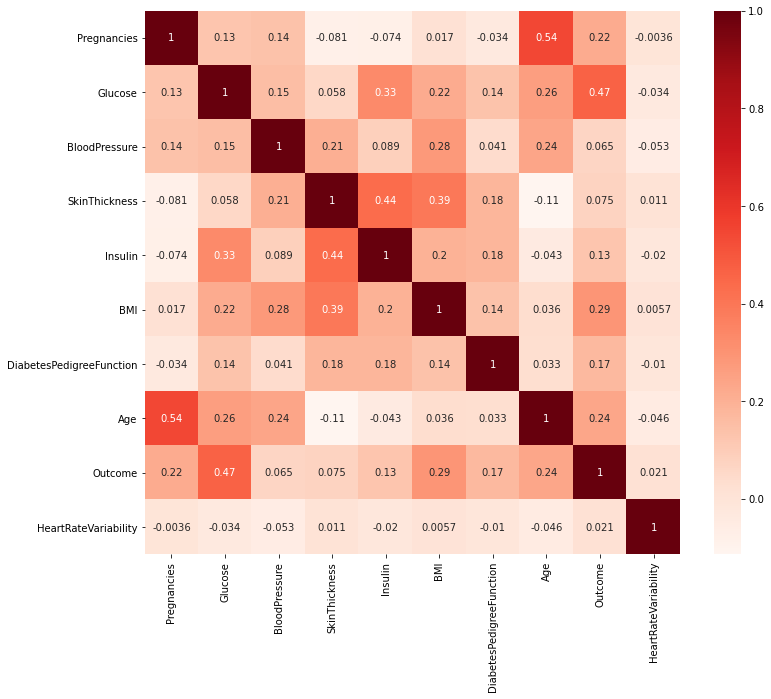

In [11]:
plt.figure(figsize=(12,10))
cor = diabetes_prediction.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
Y=diabetes_prediction.Outcome

In [ ]:
Y.head()

In [14]:
diabetes_prediction = diabetes_prediction.drop("Outcome", axis = 1)

In [15]:
diabetes_prediction = diabetes_prediction.drop("DiabetesPedigreeFunction", axis = 1)

In [16]:
diabetes_prediction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,HeartRateVariability
0,6,148,72,35,0,33.6,50,68.0
1,1,85,66,29,0,26.6,31,89.0
2,8,183,64,0,0,23.3,32,61.0
3,1,89,66,23,94,28.1,21,69.0
4,0,137,40,35,168,43.1,33,86.0


In [ ]:
X1.head()

In [ ]:
X2 = X1.drop("DiabetesPedigreeFunction", axis = 1)

In [ ]:
X2.head()

In [ ]:
Y.head()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes_prediction, Y, test_size = 0.2, random_state = 45)


In [18]:
print('Dimension of train X_data : ',x_train.shape)
print('Dimension of train Y_data : ',y_train.shape)
print('Dimension of test X_data : ',x_test.shape)
print('Dimension of test Y_data : ',y_test.shape)

Dimension of train X_data :  (613, 8)
Dimension of train Y_data :  (613,)
Dimension of test X_data :  (154, 8)
Dimension of test Y_data :  (154,)


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
model = Sequential()
model.add(Dense(units=16,activation='relu',input_dim=8,name='layer_1'))
model.add(Dense(units=32,activation='relu',name='layer_2'))
model.add(Dense(units=1,activation='sigmoid',name='output_layer'))

In [21]:
from keras.optimizers import Adam, SGD, RMSprop

In [22]:
sgd = SGD(lr=0.05)


In [23]:
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'],sample_weight_mode=None)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 16)                144       
_________________________________________________________________
layer_2 (Dense)              (None, 32)                544       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train,y_train,epochs=40,batch_size=10,verbose=2)

Epoch 1/40
62/62 - 1s - loss: 1.9333 - accuracy: 0.5889
Epoch 2/40
62/62 - 0s - loss: 0.6691 - accuracy: 0.6623
Epoch 3/40
62/62 - 0s - loss: 0.6142 - accuracy: 0.7031
Epoch 4/40
62/62 - 0s - loss: 0.6191 - accuracy: 0.6949
Epoch 5/40
62/62 - 0s - loss: 0.6104 - accuracy: 0.6933
Epoch 6/40
62/62 - 0s - loss: 0.6273 - accuracy: 0.6607
Epoch 7/40
62/62 - 0s - loss: 0.5947 - accuracy: 0.7194
Epoch 8/40
62/62 - 0s - loss: 0.5879 - accuracy: 0.7129
Epoch 9/40
62/62 - 0s - loss: 0.5890 - accuracy: 0.6819
Epoch 10/40
62/62 - 0s - loss: 0.5791 - accuracy: 0.7178
Epoch 11/40
62/62 - 0s - loss: 0.5759 - accuracy: 0.7162
Epoch 12/40
62/62 - 0s - loss: 0.5513 - accuracy: 0.7423
Epoch 13/40
62/62 - 0s - loss: 0.5630 - accuracy: 0.7145
Epoch 14/40
62/62 - 0s - loss: 0.5693 - accuracy: 0.6966
Epoch 15/40
62/62 - 0s - loss: 0.5703 - accuracy: 0.7080
Epoch 16/40
62/62 - 0s - loss: 0.5557 - accuracy: 0.7259
Epoch 17/40
62/62 - 0s - loss: 0.5572 - accuracy: 0.7162
Epoch 18/40
62/62 - 0s - loss: 0.5496 - 

In [26]:
print('Training accuracy : {}'.format(model.evaluate(x_train,y_train)[1]))

20/20 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7341
Training accuracy : 0.7340946197509766


In [27]:
print('Test set accuracy : {}',format(model.evaluate(x_test,y_test)[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.6883
Test set accuracy : {} 0.6883116960525513


In [28]:
prediction = [round(i[0]) for i in model.predict(x_test)]
x_test.shape

(154, 8)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score

In [32]:
confusion_matrix(y_test,prediction,labels=[1,0])

array([[18, 33],
       [15, 88]], dtype=int64)

In [33]:
from sklearn import metrics

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.6883116883116883


In [35]:
import joblib

In [36]:
model.save('Diabetes_prediction_project.h5')

In [37]:
validation = pandas.read_csv("validation.csv")

In [43]:
validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,HeartRateVariability
0,0,148,66,23,94,23.6,50,56


In [39]:
from keras.models import load_model

In [40]:
model = load_model("C:\\Users\\SVR SOLUTIONS\\Desktop\\Uday\\data\\Diabetes_prediction_project.h5")

In [46]:
prediction_valid = [round(i[0]) for i in model.predict([0,25,85,122,25,25,25,75])]

ValueError: in user code:

    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\SVR SOLUTIONS\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 1)


In [44]:
prediction =  model.predict(0,25,85,122,25,25,25,75)

IndexError: list index out of range

In [42]:
print(prediction_valid)

[1]


In [ ]:
tensorflow.version.VERSION


In [ ]:
keras.__version__